In [1]:
#Sentiment analysis on the Stanford tweets corpus. 
#Dataset is annotated with 3 labels/emotions. 0-Negative, 4-Positive
import csv
import json
import re
import nltk
import os
import sys
import math
import random
import pandas as pd
import numpy as np
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
en_model = spacy.load('en_core_web_sm')

#Path variables
training_path = "C:/Users/cheth/Anaconda Python/Twitter Sentiment Analysis/dataset/training.csv"
test_path = "C:/Users/cheth/Anaconda Python/Twitter Sentiment Analysis/dataset/testing.csv"
write_train_path = "C:/Users/cheth/Anaconda Python/Twitter Sentiment Analysis/dataset/train.json"
write_test_path = "C:/Users/cheth/Anaconda Python/Twitter Sentiment Analysis/dataset/test.json"

In [2]:
#Reading the dataset
def read_tweets(tweet_file):
    
    data = []
    
    with open(tweet_file,'r',encoding = 'latin1') as csv_file:
        csv_reader = csv.reader(csv_file)
        single_tweet_details = []
        
        for l in csv_reader:
            
            #Only reading tweet_Sentiment_label and the actual tweet
            single_tweet_details = [l[1],l[6]]
            data.append(single_tweet_details)

    return data

In [3]:
#Function cleans the dataset entirely
def clean_data(data):
    for row in data:
        
        #Converting all tweets to lower case    
        tweet = row[1]
        tweet.lower()
        
        #Convert any url to URL
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',tweet)
        
        #Convert any '@' to 'AT_USER'
        tweet = re.sub('@[^\s]+','user_id',tweet)
        
        #Remove additional white spaces
        tweet = re.sub('[\s]+', ' ', tweet)
        tweet = re.sub('[\n]+', ' ', tweet)
        
        #Remove not alphanumeric symbols white spaces
        tweet = re.sub(r'[^\w]', ' ', tweet)
        
        #Replace #word with just word
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
        
        #Remove emoticons
        tweet = tweet.replace(':)','')
        tweet = tweet.replace(':(','')
        
        #trim the value
        tweet = tweet.strip('\'"')
        
        row[1] = tweet
         
    return data

In [4]:
#Function cleans only the tweet by removing the stopwords and punctuations
def clean_tweet(data):
    final_clean = []
    
    #Loading Spacy's default stopwords list
    stopwords = en_model.Defaults.stop_words
    
    #Adding AT_USER and URL to spacy's stopwords 
    stopwords.add("user_id")
    stopwords.add("url")
    
    #Tokenizing the tweet and removing the stopwords. Returns a list of list
    for i in data:
        text = i[1]
        #Tokenizing
        text_tokens = word_tokenize(text)
        #Converting tokens into lower case
        text_tokens = [i.lower() for i in text_tokens]
        #Stop word removal
        tokens_without_sw= [word for word in text_tokens if not word in stopwords]
        
        
        #Removal of punctuation and numbers
        temp = []
        temp1=[]

        for j in tokens_without_sw:
            #temp = []
            temp.append(j.strip('"0123456789\'"!?,."'))

        temp1.append(TreebankWordDetokenizer().detokenize(temp))
        i[1] = temp1
            
    return data

In [5]:
#Works on the training data
data = read_tweets(training_path)
cleaned = clean_data(data)
final_clean = clean_tweet(cleaned)

train_set = []
for row in final_clean:
    train_set.append(tuple(row))

new_train_set = []

#Converting into a dictionary.
for j in train_set:
    dict ={}
    dict['text'] = j[1][0]
    if j[0] =='0':
        dict['label'] = 'neg'
    elif j[0] == '4':
        dict['label'] = 'pos'
    else:
        dict['label'] ='neu'
    new_train_set.append(dict)

#Writting into a json file
with open(write_train_path, "w") as write_file:
    json.dump(new_train_set, write_file, indent=4)

In [6]:
#Works on the testing data
data = read_tweets(test_path)
cleaned = clean_data(data)
final_clean = clean_tweet(cleaned)

train_set = []
for row in final_clean:
    train_set.append(tuple(row))

new_train_set = []

#Converting into a dictionary.
for j in train_set:
    dict ={}
    dict['text'] = j[1][0]
    if j[0] =='0':
        dict['label'] = 'neg'
    elif j[0] == '4':
        dict['label'] = 'pos'
    else:
        dict['label'] ='neu'
    new_train_set.append(dict)

#Writting into a json file
with open(write_test_path, "w") as write_file:
    json.dump(new_train_set, write_file, indent=4)

In [7]:

#Reading the training dataset
train = pd.read_json(write_train_path)
#Reading the testing dataset
test= pd.read_json(write_test_path)


In [8]:
#CREATING VISUAL REPRESENTATIONS OF TWEETS USING WORDCLOUD

#Importing the necessary packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


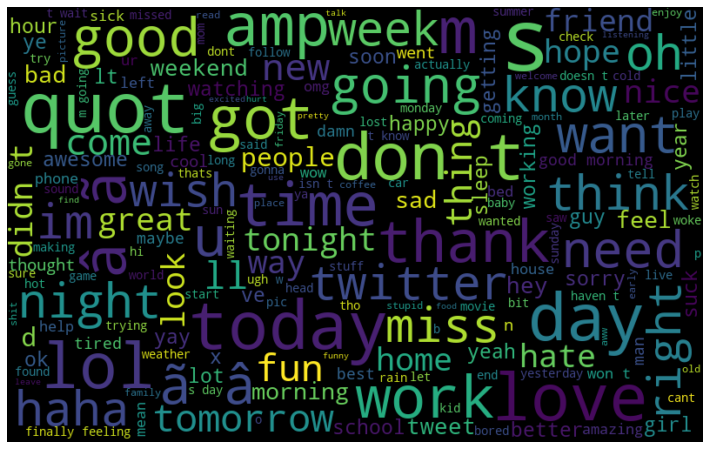

In [9]:
#Creating visusalizations for most popular words throughout the training dataset
all_words = " ".join([sentence for sentence in train['text']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph for all words
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

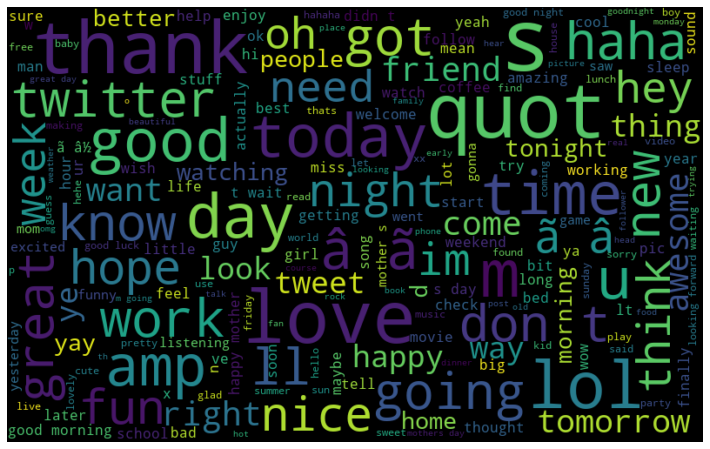

In [10]:
# Creating most commonly occuring words in positive tweets only from training data
pos_words = " ".join([sentence for sentence in train['text'][train['label']=='pos']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(pos_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

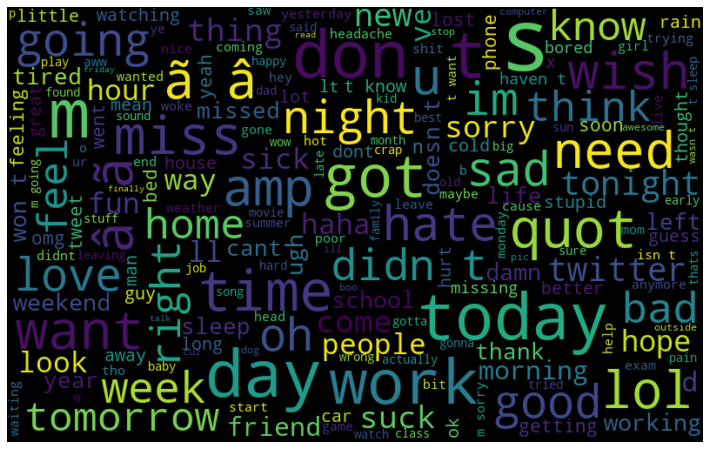

In [11]:
# Creating most commonly occuring words in negetive tweets only from training data
neg_words = " ".join([sentence for sentence in train['text'][train['label']=='neg']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neg_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()